#**CASO APLICATIVO - RIESGO PAÍS (DATA BCRP)**



# **Modelo de Cointegración**
---



# **1) Información del BCRP**

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
embi_lat = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01137XM/html")
embi_lat

[                                                   0                                                  1
 0  Consulta de SeriesPor CategoríaPor FrecuenciaP...  Desde:  Ene  Feb  Mar  Abr  May  Jun  Jul  Ago...,
      Fecha  Indicadores de riesgo para países emergentes: EMBIG - Latin EMBIG Países Latinoamericanos
 0    Ago06                                                200                                        
 1    Sep06                                                212                                        
 2    Oct06                                                202                                        
 3    Nov06                                                202                                        
 4    Dic06                                                192                                        
 ..     ...                                                ...                                        
 176  Abr21                                                382      

In [ ]:
#faqs > table > tbody > tr > td > table > tbody > tr > td > div > table > tbody > tr:nth-child(2) > td > div:nth-child(2) > table > tbody > tr > td:nth-child(1) > div > span > a

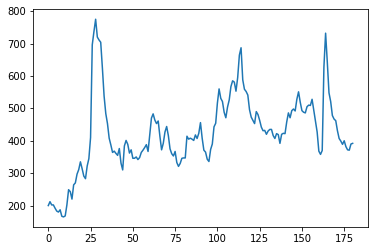

In [ ]:
embi_lat = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01137XM/html")[1]
embi_lat.columns=["Fecha","Embit_lat"]
embi_lat["Embit_lat"].plot()

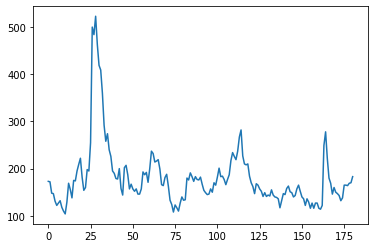

In [ ]:
embi_pe = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01129XM/html")[1]
embi_pe.columns=["Fecha","Embit_peru"]
embi_pe["Embit_peru"].plot()


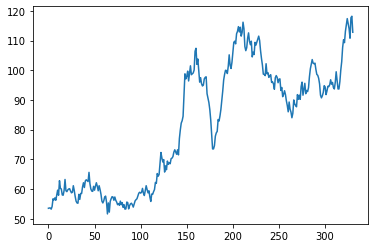

In [ ]:
ti = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01709BM/html")[1]
ti.columns=["Fecha","T_intercambio"]
ti["T_intercambio"].plot()

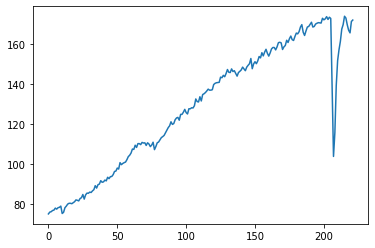

In [ ]:
pbi_d = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01773AM/html")[1]
pbi_d.columns=["Fecha","PBI_des"]
pbi_d["PBI_des"].plot()

In [ ]:
pbi_d

,Fecha,PBI_des
0,Ene03,75.0
1,Feb03,75.9
2,Mar03,76.1
3,Abr03,76.7
4,May03,76.9
...,...,...
217,Feb21,169.4
218,Mar21,166.7
219,Abr21,165.4
220,May21,171.1


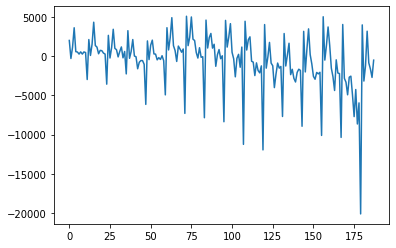

In [ ]:
deficit = pd.read_html("https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN02218FM/html")[1]
deficit.columns=["Fecha","Deficit"]
deficit["Deficit"].plot()

In [ ]:
data = pd.merge(embi_pe, embi_lat, how="inner", on=["Fecha"])
data

,Fecha,Embit_peru,Embit_lat
0,Ago06,173,200
1,Sep06,172,212
2,Oct06,148,202
3,Nov06,147,202
4,Dic06,131,192
...,...,...,...
176,Abr21,165,382
177,May21,164,372
178,Jun21,169,371
179,Jul21,170,390


In [ ]:
data = pd.merge(embi_pe, embi_lat, how="inner", on=["Fecha"])
data = pd.merge(data, pbi_d, how="inner", on=["Fecha"])
data = pd.merge(data, ti, how="inner", on=["Fecha"])
data

,Fecha,Embit_peru,Embit_lat,PBI_des,T_intercambio
0,Ago06,173,200,93.3,99.7
1,Sep06,172,212,92.6,96.4
2,Oct06,148,202,93.6,98.9
3,Nov06,147,202,93.7,101.5
4,Dic06,131,192,94.6,98.5
...,...,...,...,...,...
174,Feb21,138,389,169.4,115.7
175,Mar21,165,400,166.7,114.0
176,Abr21,165,382,165.4,110.8
177,May21,164,372,171.1,117.7


In [ ]:
date =pd.DataFrame({"Date" :pd.date_range(start="2006-08-01", end="2021-07-01", freq="M")})
data = pd.concat([data,date], axis=1)
data

,Fecha,Embit_peru,Embit_lat,PBI_des,T_intercambio,Date
0,Ago06,173,200,93.3,99.7,2006-08-31
1,Sep06,172,212,92.6,96.4,2006-09-30
2,Oct06,148,202,93.6,98.9,2006-10-31
3,Nov06,147,202,93.7,101.5,2006-11-30
4,Dic06,131,192,94.6,98.5,2006-12-31
...,...,...,...,...,...,...
174,Feb21,138,389,169.4,115.7,2021-02-28
175,Mar21,165,400,166.7,114.0,2021-03-31
176,Abr21,165,382,165.4,110.8,2021-04-30
177,May21,164,372,171.1,117.7,2021-05-31


In [ ]:
data.index = data["Date"]
data = data[["Embit_peru","Embit_lat","PBI_des","T_intercambio"]]
data

,Embit_peru,Embit_lat,PBI_des,T_intercambio
Date,,,,
2006-08-31,173,200,93.3,99.7
2006-09-30,172,212,92.6,96.4
2006-10-31,148,202,93.6,98.9
2006-11-30,147,202,93.7,101.5
2006-12-31,131,192,94.6,98.5
...,...,...,...,...
2021-02-28,138,389,169.4,115.7
2021-03-31,165,400,166.7,114.0
2021-04-30,165,382,165.4,110.8


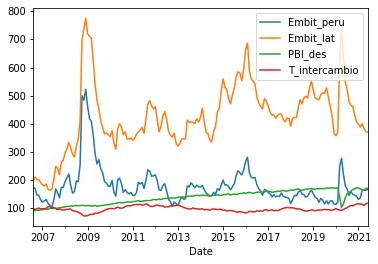

In [ ]:
data.plot()

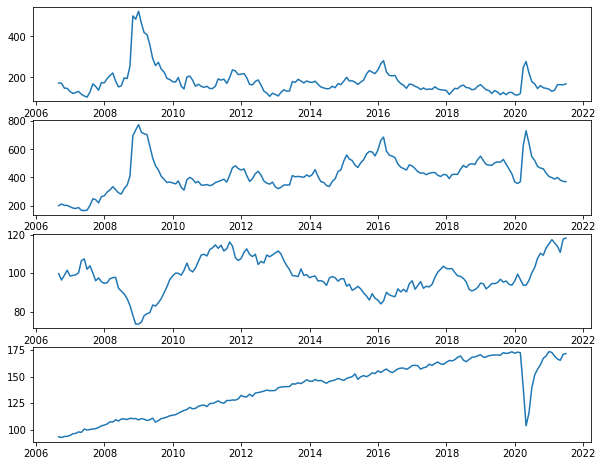

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
ax = plt.subplot(411)
ax.plot(data.index, data["Embit_peru"])
ax = plt.subplot(412)
ax.plot(data.index, data["Embit_lat"])
ax = plt.subplot(413)
ax.plot(data.index, data["T_intercambio"])
ax = plt.subplot(414)
ax.plot(data.index, data["PBI_des"])

In [ ]:
data = np.log(data)
data

,Embit_peru,Embit_lat,PBI_des,T_intercambio
Date,,,,
2006-08-31,5.153292,5.298317,4.535820,4.602166
2006-09-30,5.147494,5.356586,4.528289,4.568506
2006-10-31,4.997212,5.308268,4.539030,4.594109
2006-11-30,4.990433,5.308268,4.540098,4.620059
2006-12-31,4.875197,5.257495,4.549657,4.590057
...,...,...,...,...
2021-02-28,4.927254,5.963579,5.132263,4.751001
2021-03-31,5.105945,5.991465,5.116196,4.736198
2021-04-30,5.105945,5.945421,5.108367,4.707727


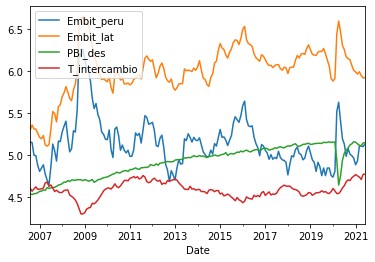

In [ ]:
data.plot()

# **2) Estimación del modelo VECM**


## **a) Selección del orden del VAR**

In [ ]:
lag_order = select_order(data=data, maxlags=10, deterministic="ci")
print(lag_order.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -25.00      -24.55   1.390e-11      -24.82
1       -25.34     -24.59*   9.929e-12     -25.03*
2      -25.41*      -24.37  9.243e-12*      -24.99
3       -25.35      -24.01   9.849e-12      -24.80
4       -25.24      -23.61   1.094e-11      -24.58
5       -25.24      -23.31   1.100e-11      -24.46
6       -25.14      -22.91   1.228e-11      -24.23
7       -25.03      -22.50   1.374e-11      -24.01
8       -24.99      -22.17   1.441e-11      -23.85
9       -24.98      -21.85   1.484e-11      -23.71
10      -24.90      -21.48   1.622e-11      -23.51
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic

(2, 1, 2, 1)

## **b) Test de cointegración**

In [ ]:
rank_test = select_coint_rank(endog=data, det_order=0,k_ar_diff=3, method="trace", signif=0.05)
print(rank_test.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          45.66          47.85
-------------------------------------


In [ ]:
rank_test.rank

0

In [ ]:
rank_test = select_coint_rank(endog=data, det_order=0,k_ar_diff=12, method="trace", signif=0.05)
print(rank_test.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          60.26          47.85
  1   4          31.88          29.80
  2   4          14.48          15.49
-------------------------------------


In [ ]:
rank_test.rank

2

In [ ]:
rank_test = select_coint_rank(endog=data, det_order=0,k_ar_diff=12, method="maxeig", signif=0.05)
print(rank_test.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          28.38          27.59
  1   2          17.40          21.13
-------------------------------------


In [ ]:
rank_test.rank

1

## **c) Especificación y estimación del modelo**

In [ ]:
# Especificando el modelo
model1 = VECM(data, deterministic="n",
             k_ar_diff=lag_order.aic, 
             coint_rank=rank_test.rank) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [ ]:
# Fitear (estimar) el modelo
vecm_res = model1.fit()
print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Embit_peru
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Embit_peru       -0.2490      0.170     -1.469      0.142      -0.581       0.083
L1.Embit_lat         0.5666      0.253      2.242      0.025       0.071       1.062
L1.PBI_des          -0.1810      0.298     -0.608      0.543      -0.764       0.403
L1.T_intercambio    -0.5035      0.390     -1.290      0.197      -1.268       0.261
L2.Embit_peru       -0.3271      0.168     -1.947      0.052      -0.657       0.002
L2.Embit_lat         0.1904      0.261      0.730      0.466      -0.321       0.702
L2.PBI_des           0.1950      0.293      0.666      0.506      -0.379       0.769
L2.T_intercambio    -0.6220      0.381     -1.632      0.103      -1.369       0.125
Det. terms outside the coint. relation & lagged endog. param

In [ ]:
model2 = VECM(data, deterministic="n",
             k_ar_diff=2,
             coint_rank=rank_test.rank) 
vecm_res2 = model2.fit()
print(vecm_res2.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Embit_peru
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Embit_peru       -0.2490      0.170     -1.469      0.142      -0.581       0.083
L1.Embit_lat         0.5666      0.253      2.242      0.025       0.071       1.062
L1.PBI_des          -0.1810      0.298     -0.608      0.543      -0.764       0.403
L1.T_intercambio    -0.5035      0.390     -1.290      0.197      -1.268       0.261
L2.Embit_peru       -0.3271      0.168     -1.947      0.052      -0.657       0.002
L2.Embit_lat         0.1904      0.261      0.730      0.466      -0.321       0.702
L2.PBI_des           0.1950      0.293      0.666      0.506      -0.379       0.769
L2.T_intercambio    -0.6220      0.381     -1.632      0.103      -1.369       0.125
Det. terms outside the coint. relation & lagged endog. param

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [ ]:
data.columns

Index(['Embit_peru', 'Embit_lat', 'PBI_des', 'T_intercambio'], dtype='object')

In [ ]:
model3 = VECM(endog=data[['Embit_peru', 'Embit_lat', 'PBI_des']], exog=data['T_intercambio'], deterministic="n",
             k_ar_diff=2,
             coint_rank=rank_test.rank) 
vecm_res3 = model3.fit()
print(vecm_res3.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Embit_peru
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
exog1            -0.2222      0.055     -4.026      0.000      -0.330      -0.114
L1.Embit_peru    -0.2441      0.171     -1.426      0.154      -0.580       0.091
L1.Embit_lat      0.5768      0.254      2.275      0.023       0.080       1.074
L1.PBI_des       -0.2268      0.302     -0.752      0.452      -0.818       0.364
L2.Embit_peru    -0.3691      0.169     -2.183      0.029      -0.701      -0.038
L2.Embit_lat      0.3315      0.253      1.308      0.191      -0.165       0.828
L2.PBI_des        0.1419      0.296      0.480      0.631      -0.438       0.721
Det. terms outside the coint. relation & lagged endog. parameters for equation Embit_lat
                    coef    std err          z      P>|z|      [0.025      0.975]
-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


## **d) Análisis de escenarios**

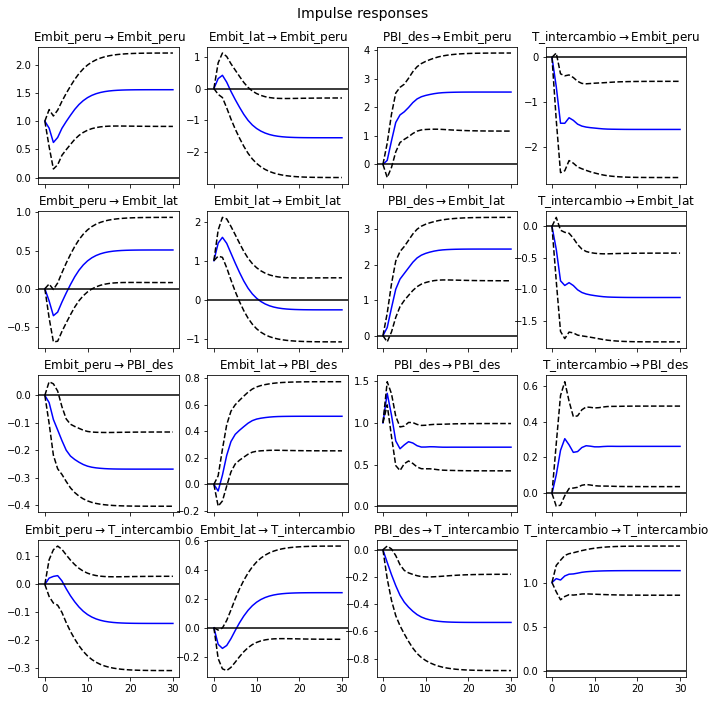

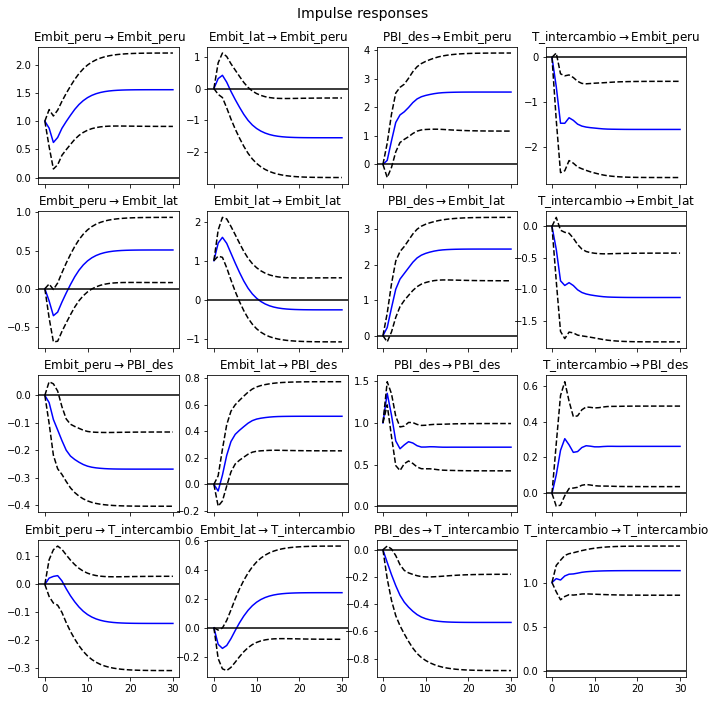

In [ ]:
num_periods = 30
ir = vecm_res.irf(periods=num_periods)
ir.plot()

## **e) Proyección** 

In [ ]:
vecm_res.predict(steps=5)

array([[5.14853421, 5.94039141, 5.12494617, 4.76198433],
       [5.20991171, 5.99395456, 5.09984053, 4.75160588],
       [5.2784205 , 6.05545801, 5.08382568, 4.74025734],
       [5.32878863, 6.10620356, 5.07587572, 4.72868349],
       [5.37031092, 6.1487087 , 5.07170522, 4.71885527]])

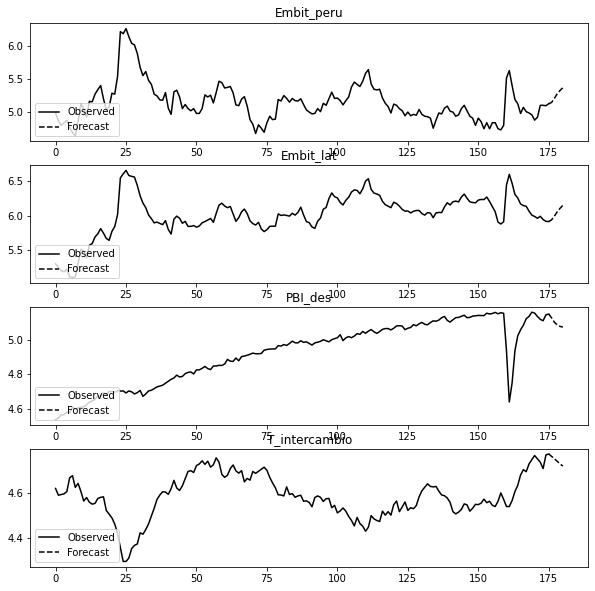

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

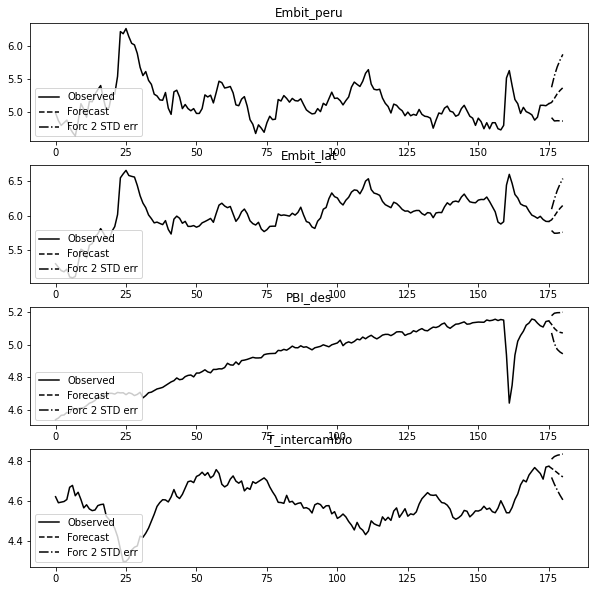

In [ ]:
vecm_res.plot_forecast(steps=5)